Stage 1:
- import relevant libraries
- import csv data
- some early feature selection - dropping columns, cutting down data to analyse
- clean data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
pd.set_option('max_row',500)
import warnings
warnings.filterwarnings('ignore') 

pd.options.display.max_columns = None

In [3]:
 # import csv data
 
 data = pd.read_csv("fifa21_male2.csv")

In [4]:
# standardise column names

data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [5]:
data.head()

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [6]:
data.shape

(17125, 107)

In [7]:
data['id'].nunique()

17125

In [8]:
# set id columnto index as all values in this column are unique (this way we can use the index after dropping name column to search for players)
data = data.set_index('id')

In [9]:
# check to see how many genders there are
data['gender'].nunique()


1

Some early feature selection based on intuition/prior football knowledge

In [10]:
features = ['name', 'age', 'ova','nationality', 'club', 'bp', 'pot', 'height', 'weight', 'foot', 'growth', 'value', 'wage', 'release_clause', 'contract', 'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping', 'total_stats', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']
data_copy = data[[*features]]

In [11]:
# dropped columns: 
# position: redundant - already know based on bp
# player_photo, club_logo, flag_photo - contains png image files - not relevant for data analysis
# team & contract: already know both from columns club & contract
# joined & loan_date_end  - not relevant for my data analysis
# cut down on the stats: eg attacking: the figures for crossing, finishing, heading_accuracy, short_passing & volleys summed up equal attacking - same for skill, defending etc, so dropped the unnecessary columns
# W/f, sm, a/w, d/w - week foot, skill moves, attacking work-rate and defensive work-rate - not interested in these for my analysis which focuses on the variables mentioned at the start
# ls, st, rs and everything to the right - also not necessary for the analysis - we already have the ova for every player, we don't need a breakdown of the rating for every other position
# gender - there is only 1 gender (male)

In [12]:
# new data containing only the columns I think are relevant for my analysis
data_copy.head()

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,contract,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,LWB,69,"6'0""",181lbs,Left,0,€625K,€7K,€0,2008 ~ 2016,313,338,347,347,320,208,56,1929,2 ★,71,59,70,71,68,69
16,Luis García,37,71,Spain,KAS Eupen,CM,71,"5'10""",143lbs,Right,0,€600K,€7K,€1.1M,2014 ~ 2019,337,369,305,324,362,153,56,1906,1 ★,53,69,73,69,58,63
27,J. Cole,33,71,England,Coventry City,CAM,71,"5'9""",161lbs,Right,0,€1.1M,€15K,€0,2016 ~ 2020,337,387,295,284,317,99,51,1770,2 ★,45,68,76,77,36,52
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,"5'11""",165lbs,Right,14,€0,€0,€0,2009,264,255,176,239,271,75,68,1348,1 ★,61,66,66,69,47,60
41,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,"5'7""",150lbs,Right,0,€5.5M,€12K,€7.2M,2018 ~ 2021,367,408,346,297,370,181,45,2014,4 ★,58,70,85,85,63,59


In [13]:
data_copy.info()
# we don't have any null values apart from 23 in the club column which will be dropped before the modellling anyway
# still need to convert value, wage, release_clause, ir columns to integer and remove € and * signs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 2 to 259105
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            17125 non-null  object
 1   age             17125 non-null  int64 
 2   ova             17125 non-null  int64 
 3   nationality     17125 non-null  object
 4   club            17102 non-null  object
 5   bp              17125 non-null  object
 6   pot             17125 non-null  int64 
 7   height          17125 non-null  object
 8   weight          17125 non-null  object
 9   foot            17125 non-null  object
 10  growth          17125 non-null  int64 
 11  value           17125 non-null  object
 12  wage            17125 non-null  object
 13  release_clause  17125 non-null  object
 14  contract        17125 non-null  object
 15  attacking       17125 non-null  int64 
 16  skill           17125 non-null  int64 
 17  movement        17125 non-null  int64 
 18  power

In [14]:
# value, wage, release clause need to be converted into integers
# first make copy of data in case we mess it up then remove € sign from these columnns

data_copy["value"] = data_copy["value"].str.replace("€","")
data_copy["wage"] = data_copy["wage"].str.replace("€","")
data_copy["release_clause"] = data_copy["release_clause"].str.replace("€","")

In [15]:
# function to convert currency columns into integer and remove 'M' & 'K' characters

def currency_cleaner(x):
    if 'M' in str(x):
        x = str(x).replace('M',"")
        x = float(x) * 1000000
    elif 'K' in str(x):
        x = str(x).replace('K',"")
        x = float(x) * 1000
    return float(x)

In [16]:
# apply function to the relevant columns

data_copy['value'] = data_copy['value'].apply(currency_cleaner)
data_copy['wage'] = data_copy['wage'].apply(currency_cleaner)
data_copy['release_clause'] = data_copy['release_clause'].apply(currency_cleaner)

In [17]:
# convert ir column to integer
data_copy['ir'] = data_copy['ir'].str.replace('★','')
data_copy['ir'] = data_copy['ir'].astype(int)

Contract column needs to be converted to integer and split into 2 columns (1 column to show how long is left on contract - could be important factor deciding value)

In [18]:
# new dataframe for the contracts to seperate the contract column into contract start and end dates so I can work out the length of contract left per player (if contract finished will replace with the mean)
contracts = data_copy['contract'].str.split("~",n=1, expand=True)

In [19]:
contracts

,0,1
id,,
2,2008,2016
16,2014,2019
27,2016,2020
36,2009,None
41,2018,2021
...,...,...
259088,"Jun 30, 2021 On Loan",None
259090,2020,2021
259091,2020,2022


In [20]:
contracts = contracts.rename(columns={0: "start", 1: "end"})
contracts

,start,end
id,,
2,2008,2016
16,2014,2019
27,2016,2020
36,2009,None
41,2018,2021
...,...,...
259088,"Jun 30, 2021 On Loan",None
259090,2020,2021
259091,2020,2022


In [21]:
contracts.value_counts()


start                                 end  
2019                                   2021    1348
2018                                   2021    1077
2019                                   2022    1069
2020                                   2022    1019
2019                                   2023     912
2020                                   2021     895
                                       2023     833
                                       2024     630
2018                                   2022     618
2017                                   2021     615
2019                                   2024     506
2018                                   2023     448
2019                                   2020     417
2017                                   2022     403
2018                                   2020     350
2016                                   2021     345
2020                                   2020     274
2017                                   2020     267
                    

In [22]:
# change from float to numeric (coerce errors, if there is a string in there it will replace with NaN which is fine because all of these are in the 'start' column, we only need the 'end' column)
contracts["start"] = pd.to_numeric(contracts["start"],errors='coerce')
contracts["end"] = pd.to_numeric(contracts["end"],errors='coerce')



In [23]:
contracts.dtypes

start    float64
end      float64
dtype: object

In [24]:
pd.options.display.float_format = '{:,.0f}'.format
contracts

,start,end
id,,
2,"2,008","2,016"
16,"2,014","2,019"
27,"2,016","2,020"
36,"2,009",NaN
41,"2,018","2,021"
...,...,...
259088,NaN,NaN
259090,"2,020","2,021"
259091,"2,020","2,022"


In [98]:
# this function just replaces all the values in 'start' with 2021 (this year) so I can then work out how long is left in the player's contract
def date_cleaner(x=2021):
    x = 2023
    return x

In [99]:
contracts['start'] = contracts['start'].apply(date_cleaner)


In [100]:
contracts['start']

id
2         2023
16        2023
27        2023
36        2023
41        2023
          ... 
259088    2023
259090    2023
259091    2023
259101    2023
259105    2023
Name: start, Length: 17125, dtype: int64

In [27]:
contracts['length'] = contracts['end'].sub(contracts['start'], axis = 0)

In [28]:
contracts

,start,end,length
id,,,
2,"2,021","2,016",-5
16,"2,021","2,019",-2
27,"2,021","2,020",-1
36,"2,021",NaN,NaN
41,"2,021","2,021",0
...,...,...,...
259088,NaN,NaN,NaN
259090,"2,021","2,021",0
259091,"2,021","2,022",1


In [29]:
# replace negative values with 0 to work out mean
contracts[contracts < 0] = 0

In [30]:
# work out average length left on contract to use for players who have an expired contract (retired) or no contract length was available
contract_avg = contracts['length'].mean(skipna=True)

In [31]:
# replaces NaNs with mean
contracts['length'] = contracts['length'].fillna(contracts['length'].mean())

In [32]:
# replaces 0s with mean
contracts['length'] = contracts['length'].replace({0: contract_avg})
contracts

,start,end,length
id,,,
2,"2,021","2,016",1
16,"2,021","2,019",1
27,"2,021","2,020",1
36,"2,021",NaN,1
41,"2,021","2,021",1
...,...,...,...
259088,NaN,NaN,1
259090,"2,021","2,021",1
259091,"2,021","2,022",1


In [33]:
contracts.value_counts()


start  end    length
2,021  2,021  1         4816
       2,022  1         3646
       2,023  2         2766
       2,020  1         1698
       2,024  3         1563
       2,025  4          429
       2,019  1          256
       2,018  1          123
       2,017  1           93
       2,016  1           80
       2,015  1           58
       2,014  1           45
       2,013  1           29
       2,012  1           26
       2,011  1           20
       2,026  5            4
       2,027  6            1
       2,028  7            1
dtype: int64

In [34]:
# add length of contact  to new copy of main dataframe
data_copy2 = pd.concat([data_copy, contracts['length']], 
                  axis = 1)

In [35]:
# drop contract column and rename length column to 'years_left_on_contract'
data_copy2 = data_copy2.drop('contract',axis=1)
data_copy2 = data_copy2.rename(columns={"length": "years_left_on_contract"})
data_copy2

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy,years_left_on_contract
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,LWB,69,"6'0""",181lbs,Left,0,"625,000","7,000",0,313,338,347,347,320,208,56,1929,2,71,59,70,71,68,69,1
16,Luis García,37,71,Spain,KAS Eupen,CM,71,"5'10""",143lbs,Right,0,"600,000","7,000","1,100,000",337,369,305,324,362,153,56,1906,1,53,69,73,69,58,63,1
27,J. Cole,33,71,England,Coventry City,CAM,71,"5'9""",161lbs,Right,0,"1,100,000","15,000",0,337,387,295,284,317,99,51,1770,2,45,68,76,77,36,52,1
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,"5'11""",165lbs,Right,14,0,0,0,264,255,176,239,271,75,68,1348,1,61,66,66,69,47,60,1
41,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,"5'7""",150lbs,Right,0,"5,500,000","12,000","7,200,000",367,408,346,297,370,181,45,2014,4,58,70,85,85,63,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,CB,69,"6'6""",165lbs,Right,5,"550,000","2,000",0,197,193,243,279,218,198,39,1367,1,54,30,37,48,64,69,1
259090,W. Rickard,18,56,Wales,Burnley,CAM,66,"5'10""",170lbs,Right,10,"130,000","3,000","273,000",248,264,298,271,259,132,57,1529,1,62,46,57,56,43,55,1
259091,C. Barrett,18,56,England,Burnley,RB,67,"5'9""",154lbs,Right,11,"130,000","2,000","273,000",218,212,308,233,256,163,40,1430,1,63,35,44,52,54,55,1


In [36]:
# next step: check for players whose value is 0 - I think it makes sense to replace the value with the average value (FIFA contains players who are long retired so have a value of 0, if they were still playing the value would not be 0 however)
data_copy2['value'].value_counts()
# there are only 457 but will still replace with the mean


1,100,000      500
0              457
1,000,000      347
325,000        342
450,000        341
1,200,000      332
275,000        307
550,000        299
475,000        298
650,000        284
525,000        284
350,000        283
375,000        278
400,000        271
300,000        270
1,300,000      266
425,000        259
625,000        249
575,000        247
800,000        246
750,000        242
675,000        240
500,000        237
5,500,000      235
1,400,000      229
600,000        212
900,000        206
250,000        197
6,500,000      193
775,000        188
1,500,000      184
925,000        183
1,800,000      178
725,000        174
875,000        168
950,000        168
8,000,000      164
850,000        163
160,000        154
1,600,000      147
700,000        146
6,000,000      144
2,000,000      144
130,000        143
2,400,000      142
170,000        142
825,000        142
7,000,000      138
7,500,000      133
1,900,000      132
180,000        131
200,000        131
8,500,000   

In [37]:
# work out average value and save to variable
value_avg = data_copy2['value'].mean(skipna=True)

In [38]:
value_avg

2567377.1678832117

In [39]:
# replace 0s with mean in value column
data_copy2['value'] = data_copy2['value'].replace({0: value_avg})
data_copy2

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy,years_left_on_contract
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,LWB,69,"6'0""",181lbs,Left,0,"625,000","7,000",0,313,338,347,347,320,208,56,1929,2,71,59,70,71,68,69,1
16,Luis García,37,71,Spain,KAS Eupen,CM,71,"5'10""",143lbs,Right,0,"600,000","7,000","1,100,000",337,369,305,324,362,153,56,1906,1,53,69,73,69,58,63,1
27,J. Cole,33,71,England,Coventry City,CAM,71,"5'9""",161lbs,Right,0,"1,100,000","15,000",0,337,387,295,284,317,99,51,1770,2,45,68,76,77,36,52,1
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,ST,82,"5'11""",165lbs,Right,14,"2,567,377",0,0,264,255,176,239,271,75,68,1348,1,61,66,66,69,47,60,1
41,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,"5'7""",150lbs,Right,0,"5,500,000","12,000","7,200,000",367,408,346,297,370,181,45,2014,4,58,70,85,85,63,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,CB,69,"6'6""",165lbs,Right,5,"550,000","2,000",0,197,193,243,279,218,198,39,1367,1,54,30,37,48,64,69,1
259090,W. Rickard,18,56,Wales,Burnley,CAM,66,"5'10""",170lbs,Right,10,"130,000","3,000","273,000",248,264,298,271,259,132,57,1529,1,62,46,57,56,43,55,1
259091,C. Barrett,18,56,England,Burnley,RB,67,"5'9""",154lbs,Right,11,"130,000","2,000","273,000",218,212,308,233,256,163,40,1430,1,63,35,44,52,54,55,1


In [40]:
# clean height column and convert to integer and cm from feet & inches
data_copy2['height'] = data_copy2["height"] = data_copy2["height"].str.replace('"',"")
data_copy2['height'] = data_copy2['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)

In [41]:
# created a function to convert pounds to kilos
def weight_cleaner(x):
    if 'lbs' in str(x):
        x = str(x).replace('lbs',"")
        x = float(x) * 0.4535
    return float(x)

In [42]:
# apply function to clean weight column
data_copy2['weight'] = data_copy2['weight'].apply(weight_cleaner)

In [43]:
# check all columns for nulls 
data_copy2.isna().sum()
# we have no nulls except 23 for club which is tolerable - I only want to keep the club at this stage to look at most valuable clubs
# will drop club and nationality before the linear regression model - not relevant for analysis of market valuable and too many categoricals in each column to encode


name                       0
age                        0
ova                        0
nationality                0
club                      23
bp                         0
pot                        0
height                     0
weight                     0
foot                       0
growth                     0
value                      0
wage                       0
release_clause             0
attacking                  0
skill                      0
movement                   0
power                      0
mentality                  0
defending                  0
goalkeeping                0
total_stats                0
ir                         0
pac                        0
sho                        0
pas                        0
dri                        0
def                        0
phy                        0
years_left_on_contract     0
dtype: int64

Stage 2:

- EDA with data visualisation using seaborn and matplotlib libraries
- Taking at look at the data and the relationship between some of the variables

- Answering these questions:

- Best team by average overall rating of players
- Highest value team based on market value of all players in team
- Build the best 11 of players based on overall rating in fifa
- Build the best 11 of players based on potential 
- 10 players with highest value
- 10 players with highest wage
- Number of players per position


In [44]:
# switch back from copy to main data to avoid confusion
data = data_copy2.copy()

In [45]:
pd.options.display.float_format = '{:20,.2f}'.format
data.describe().T.apply(lambda x: round(x))

,count,mean,std,min,25%,50%,75%,max
age,"17,125.00",25.00,5.00,16.00,21.00,25.00,29.00,53.00
ova,"17,125.00",67.00,7.00,38.00,62.00,67.00,72.00,93.00
pot,"17,125.00",72.00,6.00,47.00,69.00,72.00,76.00,95.00
height,"17,125.00",181.00,7.00,155.00,175.00,180.00,185.00,206.00
weight,"17,125.00",75.00,7.00,50.00,70.00,75.00,80.00,110.00
growth,"17,125.00",6.00,6.00,-1.00,0.00,4.00,9.00,26.00
value,"17,125.00","2,635,891.00","5,355,788.00","1,000.00","425,000.00","875,000.00","2,567,377.00","105,500,000.00"
wage,"17,125.00","10,533.00","21,145.00",0.00,"1,000.00","3,000.00","11,000.00","560,000.00"
release_clause,"17,125.00","4,574,445.00","10,338,463.00",0.00,"508,000.00","1,300,000.00","3,900,000.00","203,100,000.00"
attacking,"17,125.00",259.00,72.00,33.00,232.00,271.00,306.00,437.00


In [46]:
# quick look at the top 10 most valuable players
data.sort_values(by=['value'], ascending=False).head(10)

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy,years_left_on_contract
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
231747,K. Mbappé,21,90,France,Paris Saint-Germain,ST,95,177.80,73.01,Right,5,"105,500,000.00","160,000.00","203,100,000.00",408,394,458,404,341,100,42,2147,3,96,86,78,91,39,76,1.00
190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,LW,91,175.26,68.03,Right,0,"90,000,000.00","270,000.00","166,500,000.00",408,448,453,357,356,94,59,2175,5,91,85,86,94,36,59,1.00
192985,K. De Bruyne,29,91,Belgium,Manchester City,CAM,91,180.34,69.84,Right,0,"87,000,000.00","370,000.00","161,000,000.00",407,441,398,408,408,186,56,2304,4,76,86,93,88,64,78,2.00
188545,R. Lewandowski,31,91,Poland,FC Bayern München,ST,91,182.88,79.82,Right,0,"80,000,000.00","240,000.00","132,000,000.00",423,407,407,420,391,96,51,2195,4,78,91,78,85,43,82,2.00
208722,S. Mané,28,90,Senegal,Liverpool,LW,90,175.26,68.93,Right,0,"78,000,000.00","250,000.00","144,300,000.00",410,391,460,406,358,122,56,2203,3,94,85,80,90,44,76,2.00
209331,M. Salah,28,90,Egypt,Liverpool,RW,90,175.26,71.20,Left,0,"78,000,000.00","250,000.00","144,300,000.00",392,406,460,393,376,122,62,2211,3,93,86,81,90,45,75,2.00
203376,V. van Dijk,28,90,Netherlands,Liverpool,CB,91,193.04,92.06,Right,1,"75,500,000.00","210,000.00","145,300,000.00",316,363,354,402,347,272,58,2112,3,76,60,71,71,91,86,2.00
200389,J. Oblak,27,91,Slovenia,Atlético Madrid,GK,93,187.96,87.07,Right,2,"75,000,000.00","125,000.00","159,400,000.00",95,109,307,268,140,57,437,1413,3,87,92,78,90,52,90,2.00
202652,R. Sterling,25,88,England,Manchester City,LW,90,170.18,68.93,Right,2,"72,500,000.00","270,000.00","139,600,000.00",360,387,464,358,332,147,63,2111,3,93,81,79,90,45,67,2.00


In [47]:
# the top 10 highest salaries
data.sort_values(by=['wage'], ascending=False).head(10)

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy,years_left_on_contract
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,33,93,Argentina,FC Barcelona,RW,93,170.18,72.11,Left,0,"67,500,000.00","560,000.00","138,400,000.00",429,470,451,389,347,91,54,2231,5,85,92,91,95,38,65,1.00
192985,K. De Bruyne,29,91,Belgium,Manchester City,CAM,91,180.34,69.84,Right,0,"87,000,000.00","370,000.00","161,000,000.00",407,441,398,408,408,186,56,2304,4,76,86,93,88,64,78,2.00
183277,E. Hazard,29,88,Belgium,Real Madrid,LW,88,175.26,73.92,Right,0,"58,000,000.00","350,000.00","118,900,000.00",388,427,448,361,353,83,45,2105,4,88,82,83,92,35,66,3.00
165153,K. Benzema,32,89,France,Real Madrid,CF,89,185.42,81.18,Right,0,"53,000,000.00","350,000.00","108,700,000.00",426,404,388,400,363,89,41,2111,4,74,85,81,86,40,76,1.00
182521,T. Kroos,30,88,Germany,Real Madrid,CM,88,182.88,76.19,Right,0,"55,000,000.00","310,000.00","112,800,000.00",397,432,332,355,378,205,51,2150,4,54,81,91,81,71,69,2.00
200145,Casemiro,28,89,Brazil,Real Madrid,CDM,89,185.42,83.90,Right,0,"59,500,000.00","310,000.00","122,000,000.00",349,369,343,437,396,259,67,2220,3,65,73,76,72,86,91,2.00
153079,S. Agüero,32,89,Argentina,Manchester City,ST,89,172.72,69.84,Right,0,"53,000,000.00","300,000.00","98,100,000.00",411,397,424,403,341,83,59,2118,4,78,90,77,88,33,73,1.00
155862,Sergio Ramos,34,89,Spain,Real Madrid,CB,89,182.88,82.08,Right,0,"24,500,000.00","300,000.00","50,200,000.00",374,381,378,402,414,263,46,2258,4,71,70,76,73,88,85,1.00
194765,A. Griezmann,29,87,France,FC Barcelona,ST,87,175.26,73.01,Left,0,"50,500,000.00","290,000.00","103,500,000.00",425,429,425,402,382,162,63,2288,4,79,85,84,88,57,72,3.00


<AxesSubplot:xlabel='value', ylabel='wage'>

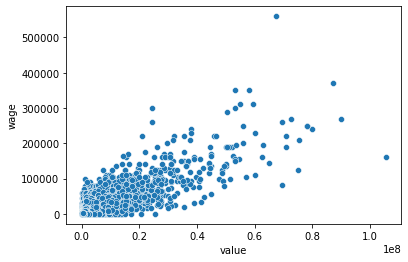

In [48]:
# relationship between wage and value
# as expected there is a high correlation
sns.scatterplot(data=data, x='value',y='wage')


In [49]:
# the top 10 players by overall rating
data.sort_values(by=['ova'], ascending=False).head(10)

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy,years_left_on_contract
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,33,93,Argentina,FC Barcelona,RW,93,170.18,72.11,Left,0,"67,500,000.00","560,000.00","138,400,000.00",429,470,451,389,347,91,54,2231,5,85,92,91,95,38,65,1.00
20801,Cristiano Ronaldo,35,92,Portugal,Juventus,ST,92,187.96,82.99,Right,0,"46,000,000.00","220,000.00","75,900,000.00",437,414,431,444,353,84,58,2221,5,89,93,81,89,35,77,1.00
192985,K. De Bruyne,29,91,Belgium,Manchester City,CAM,91,180.34,69.84,Right,0,"87,000,000.00","370,000.00","161,000,000.00",407,441,398,408,408,186,56,2304,4,76,86,93,88,64,78,2.00
188545,R. Lewandowski,31,91,Poland,FC Bayern München,ST,91,182.88,79.82,Right,0,"80,000,000.00","240,000.00","132,000,000.00",423,407,407,420,391,96,51,2195,4,78,91,78,85,43,82,2.00
190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,LW,91,175.26,68.03,Right,0,"90,000,000.00","270,000.00","166,500,000.00",408,448,453,357,356,94,59,2175,5,91,85,86,94,36,59,1.00
200389,J. Oblak,27,91,Slovenia,Atlético Madrid,GK,93,187.96,87.07,Right,2,"75,000,000.00","125,000.00","159,400,000.00",95,109,307,268,140,57,437,1413,3,87,92,78,90,52,90,2.00
192448,M. ter Stegen,28,90,Germany,FC Barcelona,GK,93,187.96,84.80,Right,3,"69,500,000.00","260,000.00","147,700,000.00",118,144,254,268,171,48,439,1442,3,88,85,88,90,45,88,1.00
231747,K. Mbappé,21,90,France,Paris Saint-Germain,ST,95,177.80,73.01,Right,5,"105,500,000.00","160,000.00","203,100,000.00",408,394,458,404,341,100,42,2147,3,96,86,78,91,39,76,1.00
212831,Alisson,27,90,Brazil,Liverpool,GK,91,190.50,91.15,Right,1,"62,500,000.00","160,000.00","120,300,000.00",114,138,268,240,140,50,439,1389,3,86,88,85,89,51,91,3.00


<AxesSubplot:xlabel='value', ylabel='ova'>

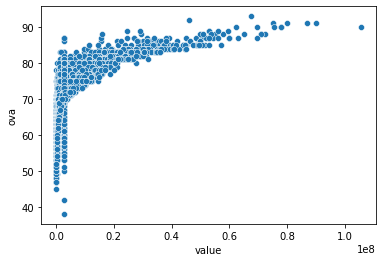

In [50]:
# graph of relationship between overall rating and value
# value and ova are highly correlated above a rating of 70
# the mean value is 1m, which most of the players have - explains high amount of dots with low value and rating between 0 - 70?
sns.scatterplot(data=data, x='value',y='ova')

In [51]:
# Top 10 teams by average overall rating of players
# this also includes national teams
data.groupby('club')['ova'].mean().sort_values(ascending=False).head(10)

club
Netherlands                        84.50
Spain                              82.00
FC Bayern München                  81.46
Palermo                            81.00
Portugal                           80.83
Brazil                             79.69
Real Madrid                        79.06
Belgium                            79.00
Argentina                          79.00
Uruguay                            78.35
Name: ova, dtype: float64

In [52]:
# 10 clubs witb the most valuable squads
data.groupby('club')['value'].sum().sort_values(ascending=False).head(10)

club
Liverpool                   852,935,000.00
Real Madrid                 768,297,377.17
Manchester City             760,452,131.50
FC Barcelona                719,234,754.34
Paris Saint-Germain         652,809,754.34
FC Bayern München           647,417,377.17
Juventus                    618,409,754.34
Chelsea                     613,972,377.17
Atlético Madrid             613,475,000.00
Tottenham Hotspur           583,025,000.00
Name: value, dtype: float64

In [53]:
# Top 10 teams by average player value
data.groupby('club')['value'].mean().sort_values(ascending=False).head(10)

club
FC Bayern München            24,900,668.35
Real Madrid                  23,281,738.70
Liverpool                    21,323,375.00
Manchester City              18,547,612.96
Paris Saint-Germain          18,133,604.29
FC Barcelona                 17,542,311.08
Atlético Madrid              15,730,128.21
Juventus                     15,460,243.86
Portugal                     14,205,792.39
Borussia Dortmund            13,966,685.87
Name: value, dtype: float64

In [54]:
# let's try and make the best team (11 players) based on the highest rated player for each position
# first print the unique values from the 'bp' (position) column
data['bp'].unique()

array(['LWB', 'CM', 'CAM', 'ST', 'RW', 'CB', 'CF', 'GK', 'CDM', 'RWB',
       'LB', 'LM', 'RM', 'RB', 'LW'], dtype=object)

In [55]:
# new dataframe which shows the best player per position
best_df = pd.DataFrame([])
for pos in data['bp'].unique():
	temp_df = data[data['bp'] == pos]
	max_rating = temp_df['ova'].max()
	temp = temp_df[temp_df['ova'] == max_rating]
	best_df = pd.concat([best_df, temp])
best_df

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy,years_left_on_contract
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
164169,Filipe Luís,32,85,Brazil,Atlético Madrid,LWB,85,182.88,73.92,Left,0,"21,500,000.00","80,000.00","44,100,000.00",353,386,372,362,371,248,49,2141,3,75,62,78,78,81,78,1.00
182521,T. Kroos,30,88,Germany,Real Madrid,CM,88,182.88,76.19,Right,0,"55,000,000.00","310,000.00","112,800,000.00",397,432,332,355,378,205,51,2150,4,54,81,91,81,71,69,2.00
192985,K. De Bruyne,29,91,Belgium,Manchester City,CAM,91,180.34,69.84,Right,0,"87,000,000.00","370,000.00","161,000,000.00",407,441,398,408,408,186,56,2304,4,76,86,93,88,64,78,2.00
20801,Cristiano Ronaldo,35,92,Portugal,Juventus,ST,92,187.96,82.99,Right,0,"46,000,000.00","220,000.00","75,900,000.00",437,414,431,444,353,84,58,2221,5,89,93,81,89,35,77,1.00
158023,L. Messi,33,93,Argentina,FC Barcelona,RW,93,170.18,72.11,Left,0,"67,500,000.00","560,000.00","138,400,000.00",429,470,451,389,347,91,54,2231,5,85,92,91,95,38,65,1.00
203376,V. van Dijk,28,90,Netherlands,Liverpool,CB,91,193.04,92.06,Right,1,"75,500,000.00","210,000.00","145,300,000.00",316,363,354,402,347,272,58,2112,3,76,60,71,71,91,86,2.00
165153,K. Benzema,32,89,France,Real Madrid,CF,89,185.42,81.18,Right,0,"53,000,000.00","350,000.00","108,700,000.00",426,404,388,400,363,89,41,2111,4,74,85,81,86,40,76,1.00
200389,J. Oblak,27,91,Slovenia,Atlético Madrid,GK,93,187.96,87.07,Right,2,"75,000,000.00","125,000.00","159,400,000.00",95,109,307,268,140,57,437,1413,3,87,92,78,90,52,90,2.00
200145,Casemiro,28,89,Brazil,Real Madrid,CDM,89,185.42,83.90,Right,0,"59,500,000.00","310,000.00","122,000,000.00",349,369,343,437,396,259,67,2220,3,65,73,76,72,86,91,2.00


In [56]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

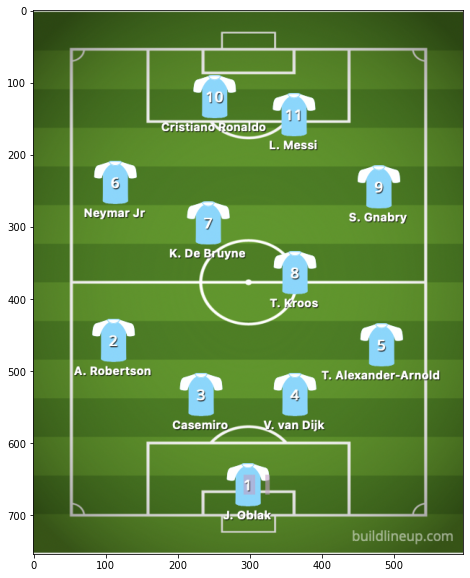

In [57]:
# I made a best 11 from the above list using a lineup builder (https://www.buildlineup.com/)
# Very attacking lineup :)
img = mpimg.imread('best_11.png')
plt.figure(figsize = (20,10))
plt.imshow(img)


In [58]:
# now let's look at the best 11 based on potential using modified version of above for loop
# here we have mulitples players with the same pot so I will choose based on personal preference 
pot_df = pd.DataFrame([])
for pos in data['bp'].unique():
	temp_df = data[data['bp'] == pos]
	max_rating = temp_df['pot'].max()
	temp = temp_df[temp_df['pot'] == max_rating]
	pot_df = pd.concat([pot_df, temp])
pot_df

,name,age,ova,nationality,club,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,ir,pac,sho,pas,dri,def,phy,years_left_on_contract
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
210035,Grimaldo,24,84,Spain,SL Benfica,LWB,88,170.18,68.93,Left,4,"35,500,000.00","20,000.00","73,700,000.00",344,412,423,375,347,232,50,2183,3,85,65,79,84,77,71,2.00
211688,Gayà,25,83,Spain,Valencia CF,LWB,88,172.72,66.21,Left,5,"30,500,000.00","46,000.00","66,300,000.00",340,365,410,321,360,245,53,2094,2,84,61,78,80,79,70,2.00
241096,S. Tonali,20,77,Italy,Milan,CM,91,180.34,79.82,Right,14,"18,500,000.00","25,000.00","43,000,000.00",341,386,384,361,352,216,44,2084,1,80,65,78,77,72,76,1.00
233049,J. Sancho,20,87,England,Borussia Dortmund,CAM,93,180.34,76.19,Right,6,"69,500,000.00","82,000.00","132,100,000.00",373,380,435,328,313,105,52,1986,3,83,74,81,91,37,64,2.00
235790,K. Havertz,21,85,Germany,Chelsea,CAM,93,187.96,82.99,Left,8,"57,000,000.00","105,000.00","119,700,000.00",400,388,403,378,319,123,47,2058,3,84,81,79,85,45,67,4.00
242444,João Félix,20,81,Portugal,Atlético Madrid,CAM,93,180.34,69.84,Right,12,"32,000,000.00","51,000.00","72,000,000.00",381,378,410,381,337,107,66,2060,1,81,81,74,83,40,69,5.00
231747,K. Mbappé,21,90,France,Paris Saint-Germain,ST,95,177.80,73.01,Right,5,"105,500,000.00","160,000.00","203,100,000.00",408,394,458,404,341,100,42,2147,3,96,86,78,91,39,76,1.00
158023,L. Messi,33,93,Argentina,FC Barcelona,RW,93,170.18,72.11,Left,0,"67,500,000.00","560,000.00","138,400,000.00",429,470,451,389,347,91,54,2231,5,85,92,91,95,38,65,1.00
235243,M. de Ligt,20,85,Netherlands,Juventus,CB,92,187.96,88.89,Right,7,"49,500,000.00","80,000.00","91,600,000.00",308,319,343,396,313,253,56,1988,3,72,59,66,69,85,84,3.00


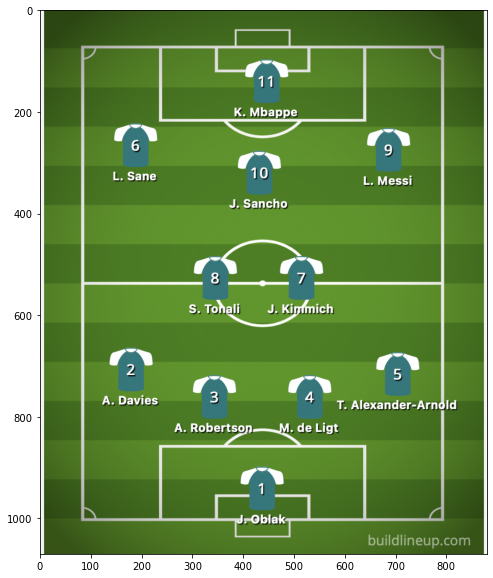

In [59]:
# here is the best 11 based on player potential
img_2 = mpimg.imread('pot_11.png')
plt.figure(figsize = (20,10))
plt.imshow(img_2)

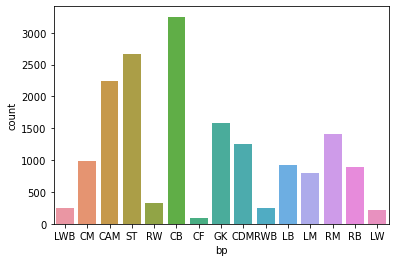

<Figure size 2160x1440 with 0 Axes>

In [60]:
# plot to show number of players per position - most players are centre backs, folllowed by striker
sns.countplot(x ='bp', data = data)
plt.figure(figsize=(30,20))
plt.show()

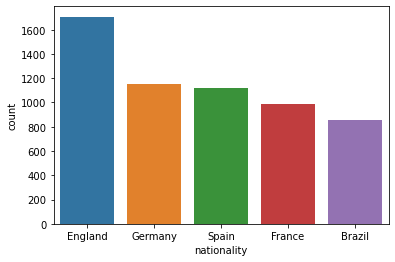

<Figure size 1800x1080 with 0 Axes>

In [61]:
# graph to show 5 countries with most players in FIFA 21
sns.countplot(x ='nationality', data = data, order=data.nationality.value_counts().iloc[:5].index)
plt.figure(figsize=(25,15))
plt.show()
# we can see England has the most followed by Germany, Spain, France, Brazil.
# indicating anglo centrism?

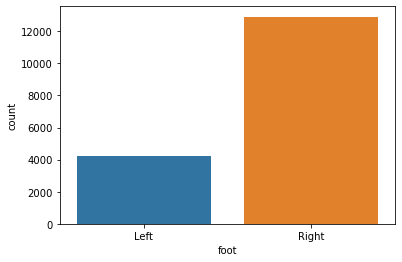

<Figure size 1800x1080 with 0 Axes>

In [62]:
# chart to show distribution of left and right feet
# many more right footers as expected
sns.countplot(x ='foot', data = data)
plt.figure(figsize=(25,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

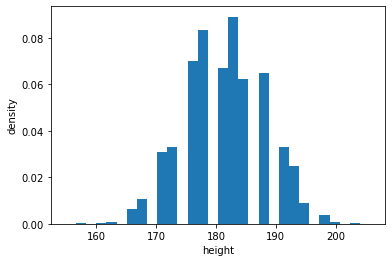

In [63]:
# distribution of player height
plt.hist(data['height'],density=True, bins =30)
plt.ylabel('density')
plt.xlabel('height')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

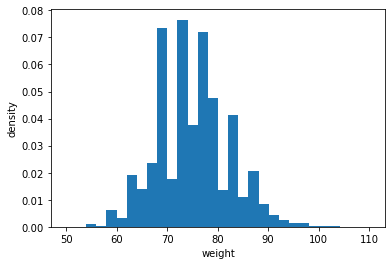

In [64]:
# distribution of player weight
plt.hist(data['weight'],density=True, bins =30)
plt.ylabel('density')
plt.xlabel('weight')
plt.show

Now let's take a look at the distribution and correlation of the variables using some data visualisation
- Conclusion: most of the data is normally distributed except age, growth, value, wage, release_clause, goalkeeping, international reputation &  years left on contract
- The data is skewed towards younger players as well as having a large amount of players with very low value with a few outliers with very high value

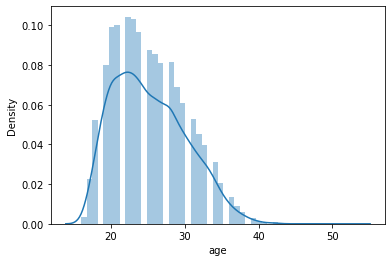

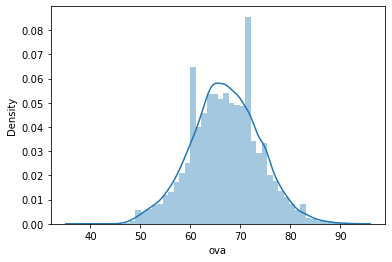

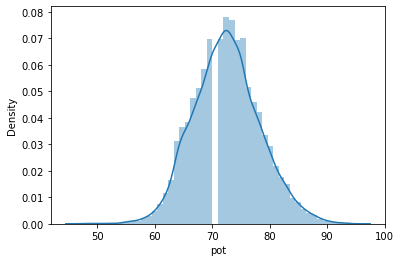

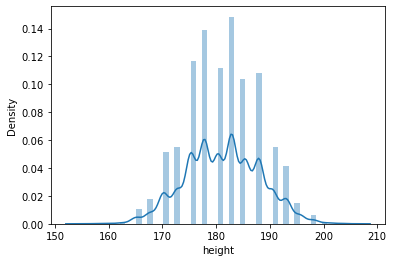

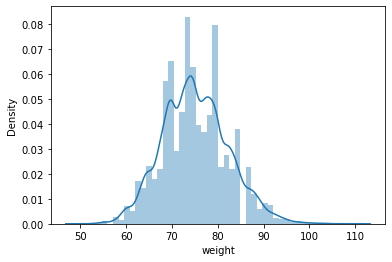

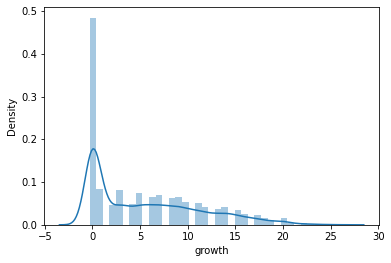

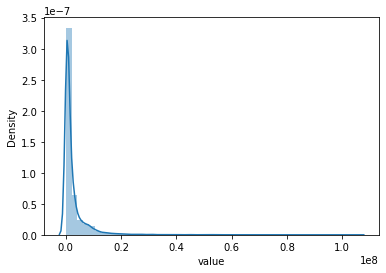

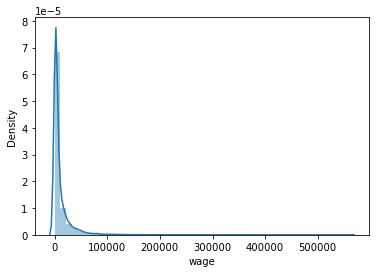

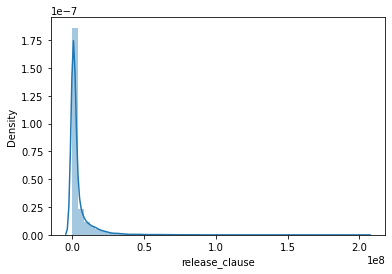

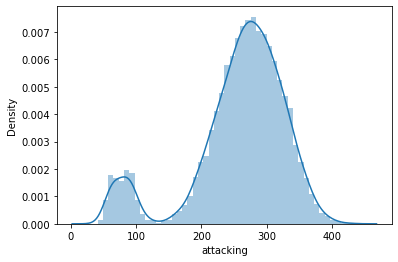

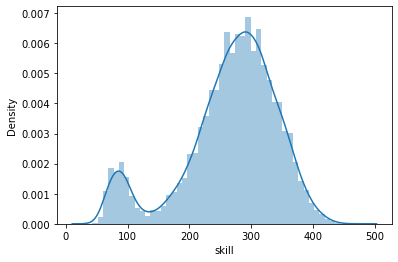

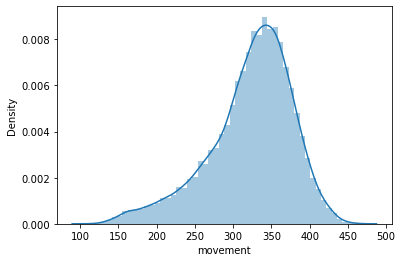

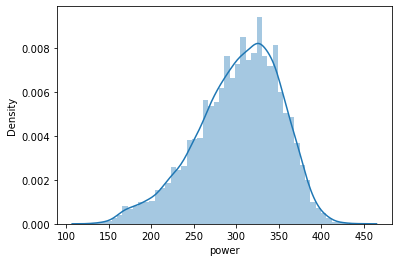

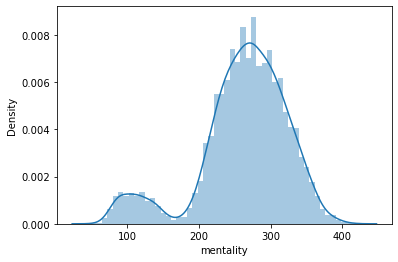

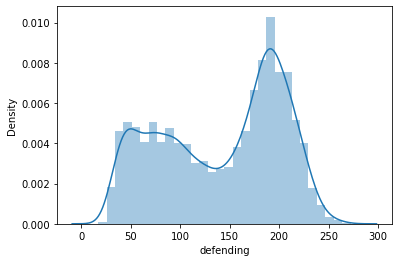

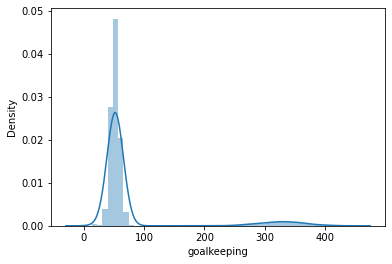

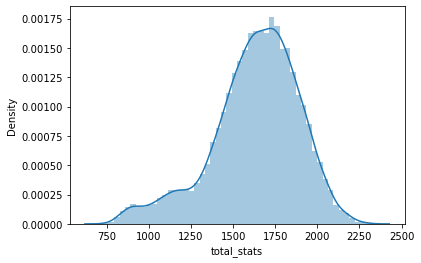

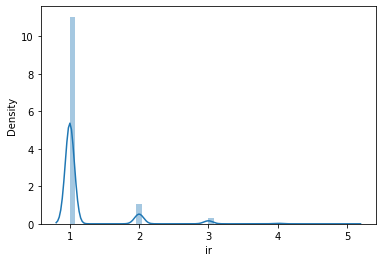

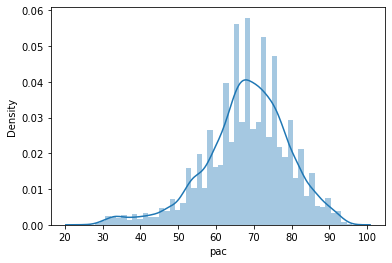

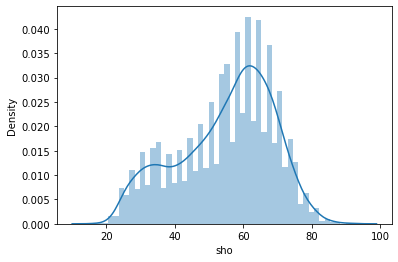

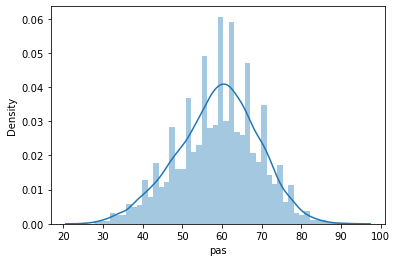

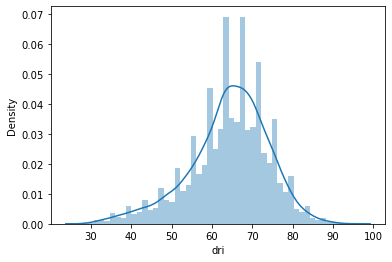

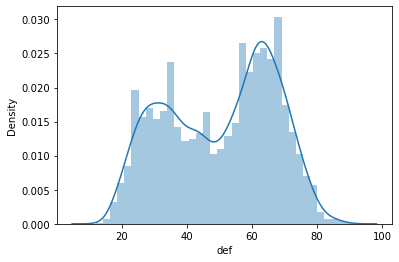

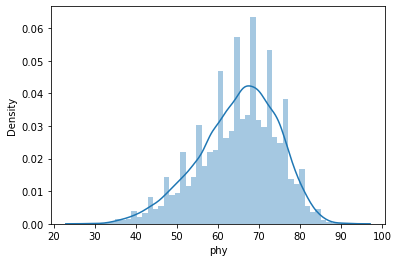

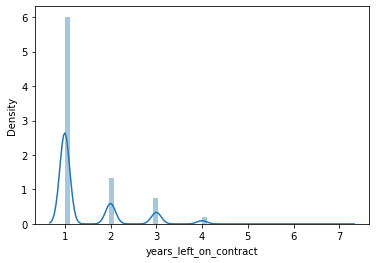

In [65]:
# distribution plots for all numerical columns
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

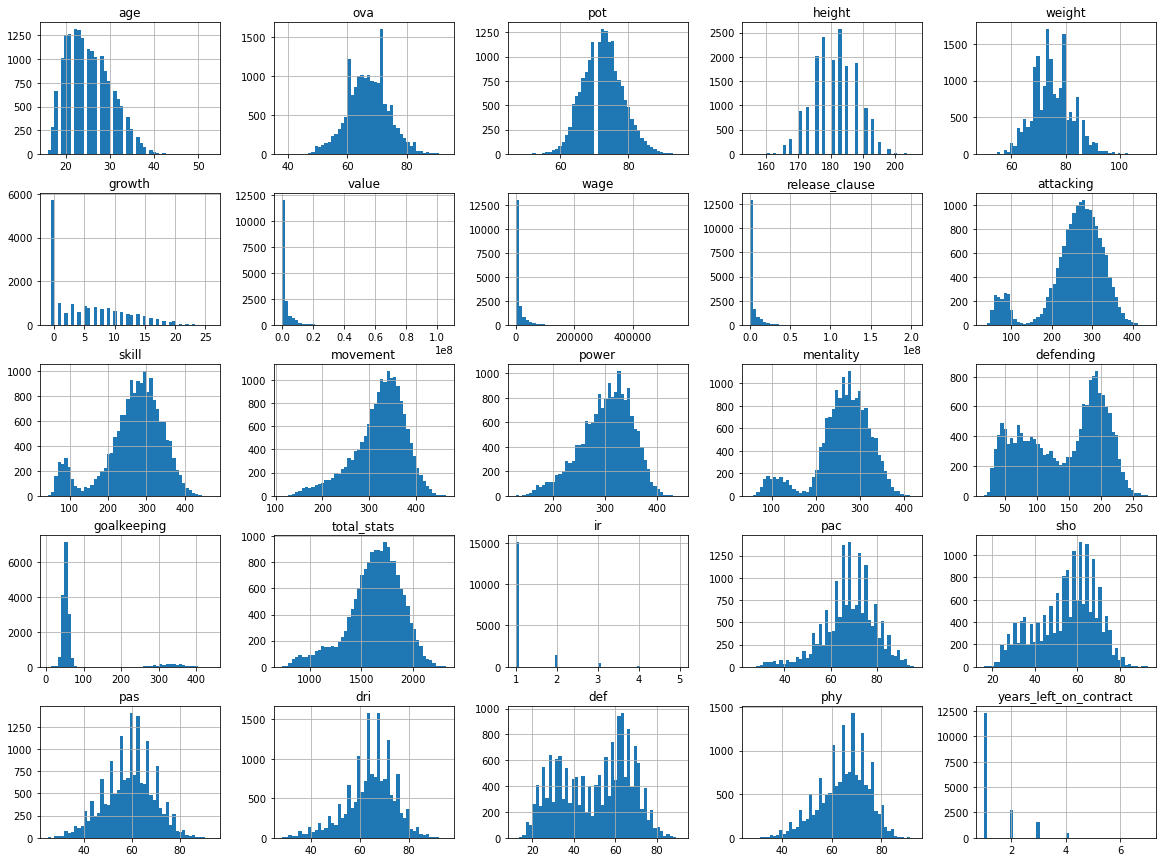

In [66]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

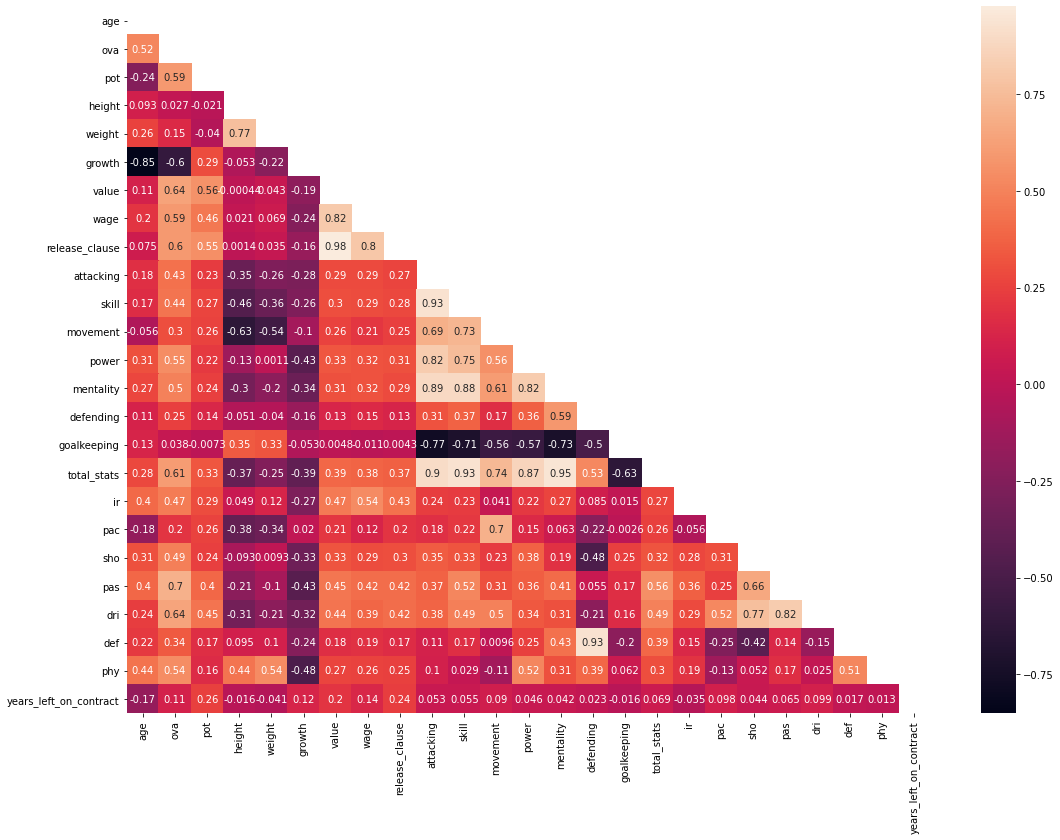

In [67]:
# correlation matrix to check correlations before dropping variables with high multicollinearity

mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(18, 13))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

Multicollinearity & more feature selection
- will drop weight & height - very low correlation to target variable - indicates lack of relationship to me
- will drop all stats columns except total stats (0.39 to value) - want to limit regresion model to a few key variables
- will drop wage - high collinearity with release_clause (0.8) but release_clause (0.98) has much high correaltion to target variable

In [68]:
# make copy and drop columns mentioned above
data_copy = data.drop(columns=['wage', 'weight', 'height', 'attacking', 'skill', 'movement', 'mentality', 'defending', 'goalkeeping', 'power', 'pac', 'sho','def', 'dri', 'pas','phy'])

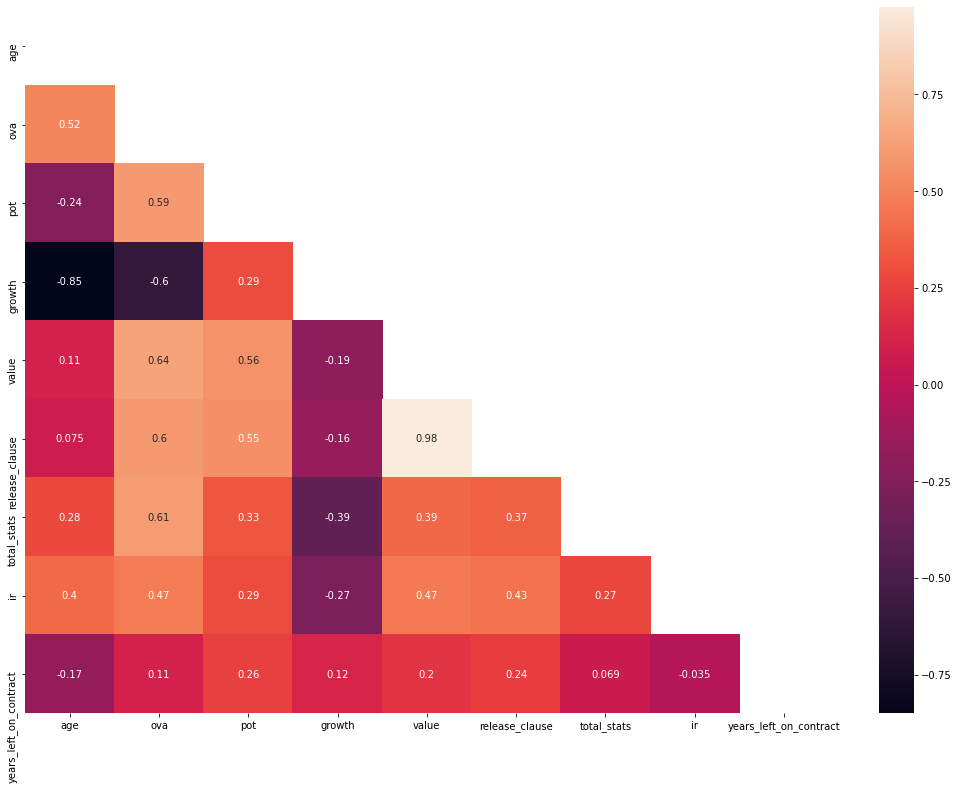

In [69]:
mask = np.zeros_like(data_copy.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(18, 13))
ax = sns.heatmap(data_copy.corr(), mask=mask, annot=True)
plt.show()

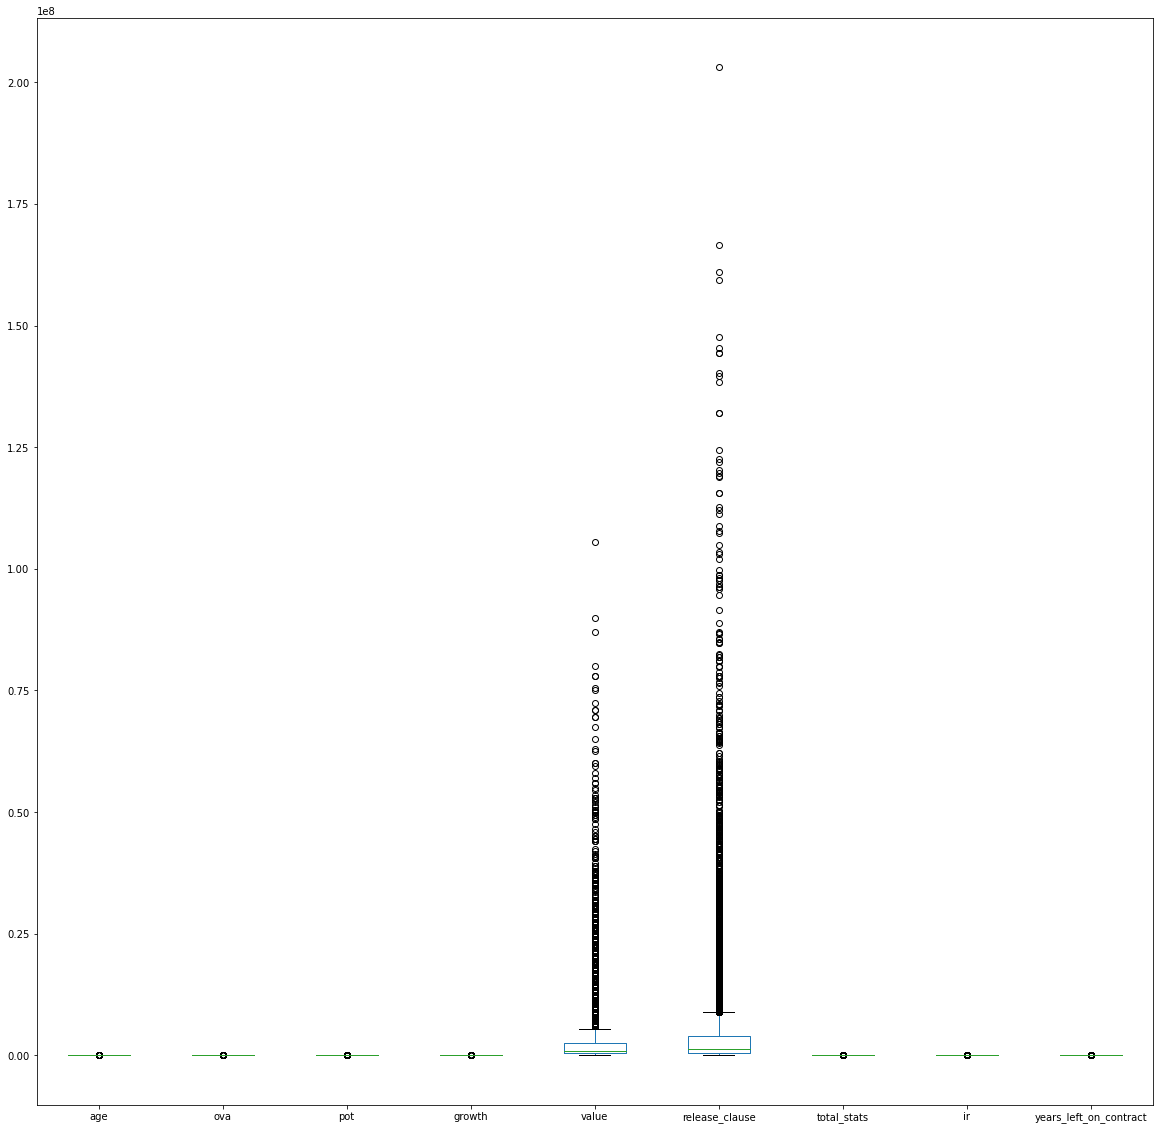

In [70]:
# boxplot for whole data
# shows large amount of outliers for value and release_clause - probably due to small amount of players with very high values/release clauses eg Mbappe, Messi etc

data_copy.plot(kind='box',figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='growth'>

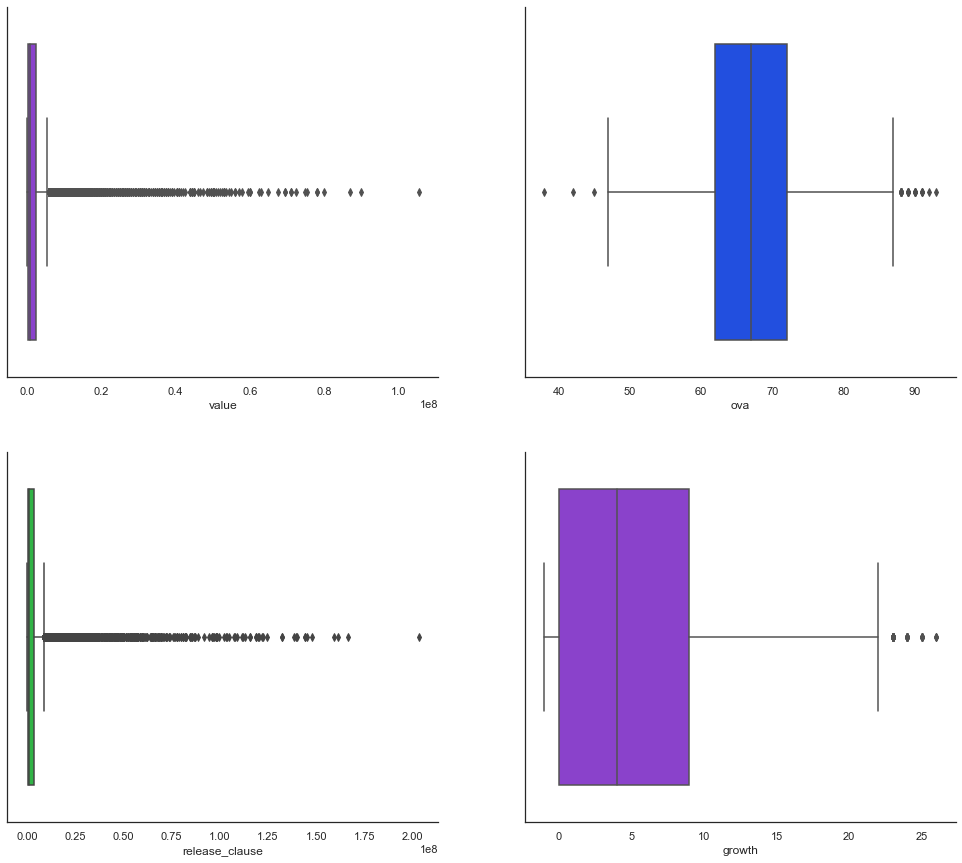

In [71]:
# check for outliers with boxplots
sns.set(style="white", palette="bright", color_codes=True)

f, axes = plt.subplots(2, 2, figsize=(17, 15), sharex=False)
sns.despine(left=False)


sns.boxplot(data_copy['value'], color="m", ax=axes[0, 0])

sns.boxplot(data_copy["ova"], color="b", ax=axes[0, 1])

sns.boxplot(data_copy["release_clause"], color="g", ax=axes[1, 0])

sns.boxplot(data_copy["growth"], color="m", ax=axes[1, 1])


Stage 3:
- data preprocessing - remove outliers based on iqr of variables
- encode categoricals
- box cox to scale data

In [72]:
# make another copy of data so we can go back and change if necessary
data = data_copy.copy()

In [73]:
# will use box cox transfromation to scale down data
# function to apply box cox to dataframe

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [74]:
df, _ci = boxcox_transform(data)
df

,name,age,ova,nationality,club,bp,pot,foot,growth,value,release_clause,total_stats,ir,years_left_on_contract
id,,,,,,,,,,,,,,
2,G. Pasquale,2.33,58.85,Italy,Udinese,LWB,13.17,Left,4.58,9.12,11.12,"17,036,421.46",0.09,-0.00
16,Luis García,2.38,60.51,Spain,KAS Eupen,CM,13.38,Right,4.58,9.10,10.33,"16,570,474.41",0.00,-0.00
27,J. Cole,2.33,60.51,England,Coventry City,CAM,13.38,Right,4.58,9.36,11.12,"13,963,951.67",0.09,-0.00
36,D. Yorke,2.37,58.02,Trinidad &amp; Tobago,Sunderland,ST,14.45,Right,7.07,9.72,11.12,"7,439,597.78",0.00,-0.00
41,Iniesta,2.37,68.77,Spain,Vissel Kobe,CAM,14.35,Right,4.58,10.02,11.29,"18,822,348.32",0.09,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,2.16,54.69,France,CD Tondela,CB,13.17,Right,2.85,9.06,11.12,"7,684,269.72",0.00,-0.00
259090,W. Rickard,2.06,48.01,Wales,Burnley,CAM,12.86,Right,5.37,8.39,9.56,"9,955,219.77",0.00,-0.00
259091,C. Barrett,2.06,48.01,England,Burnley,RB,12.97,Right,5.82,8.39,9.56,"8,527,872.18",0.00,0.00


In [75]:
_ci

{'age': [-0.2492783223122066],
 'ova': [0.9559340098746975],
 'pot': [0.462816532335289],
 'growth': [0.6548833329051343],
 'value': [-0.061224978947778216],
 'release_clause': [-0.04513159710135626],
 'total_stats': [2.3118960788829974],
 'ir': [-10.54532750030378],
 'years_left_on_contract': [-3.3240613452699805]}

In [76]:
# remove outliers function 
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [77]:
# another copy of data in case we need to go back
df1= df.copy()

In [78]:
# apply function to columns with high amount of outliers
df1 = remove_outliers(df1, threshold=1.5, in_columns=['value', 'release_clause', 'ova', 'total_stats'])

In [79]:
# before encoding the model, I will drop the irrelevant categorical columns and just leave bp (best position)
df2 = df1.drop(columns=['name', 'nationality', 'club','foot'] )


In [80]:
df2

,age,ova,bp,pot,growth,value,release_clause,total_stats,ir,years_left_on_contract
id,,,,,,,,,,
2,2.33,58.85,LWB,13.17,4.58,9.12,11.12,"17,036,421.46",0.09,-0.00
16,2.38,60.51,CM,13.38,4.58,9.10,10.33,"16,570,474.41",0.00,-0.00
27,2.33,60.51,CAM,13.38,4.58,9.36,11.12,"13,963,951.67",0.09,-0.00
36,2.37,58.02,ST,14.45,7.07,9.72,11.12,"7,439,597.78",0.00,-0.00
41,2.37,68.77,CAM,14.35,4.58,10.02,11.29,"18,822,348.32",0.09,-0.00
...,...,...,...,...,...,...,...,...,...,...
259088,2.16,54.69,CB,13.17,2.85,9.06,11.12,"7,684,269.72",0.00,-0.00
259090,2.06,48.01,CAM,12.86,5.37,8.39,9.56,"9,955,219.77",0.00,-0.00
259091,2.06,48.01,RB,12.97,5.82,8.39,9.56,"8,527,872.18",0.00,0.00


In [81]:
# encode the best position column using get_dummies method
end_data = pd.get_dummies(df2, drop_first=True)
end_data

,age,ova,pot,growth,value,release_clause,total_stats,ir,years_left_on_contract,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST
id,,,,,,,,,,,,,,,,,,,,,,,
2,2.33,58.85,13.17,4.58,9.12,11.12,"17,036,421.46",0.09,-0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0
16,2.38,60.51,13.38,4.58,9.10,10.33,"16,570,474.41",0.00,-0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27,2.33,60.51,13.38,4.58,9.36,11.12,"13,963,951.67",0.09,-0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,2.37,58.02,14.45,7.07,9.72,11.12,"7,439,597.78",0.00,-0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41,2.37,68.77,14.35,4.58,10.02,11.29,"18,822,348.32",0.09,-0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.16,54.69,13.17,2.85,9.06,11.12,"7,684,269.72",0.00,-0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
259090,2.06,48.01,12.86,5.37,8.39,9.56,"9,955,219.77",0.00,-0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259091,2.06,48.01,12.97,5.82,8.39,9.56,"8,527,872.18",0.00,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Stage 4:
- split the data into x/y sets
- split the data into test/train sets
- apply linear regression model from sklearn and then use this to print a results table to check differences between true and predicted values
- results


In [82]:
X = end_data.drop('value', axis=1)
y = end_data['value']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [84]:
# fit training data to linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
# test trained model on test set
predictions = model.predict(X_test)


In [86]:
# metrics
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9472107963418838, 0.07202725847223569, 0.12650706328996764)

In [87]:
# inverse box cox transformation I did before
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['value'])

In [88]:
# table to show results of actual value vs. predicted value
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
id,,,
213432,"7,000,000.00","3,954,154.99","3,045,845.01"
172517,"3,400,000.00","2,547,215.39","852,784.61"
239998,"325,000.00","264,245.60","60,754.40"
227370,"1,100,000.00","1,722,898.74","622,898.74"
230129,"120,000.00","94,443.36","25,556.64"
...,...,...,...
256730,"425,000.00","402,791.44","22,208.56"
259084,"150,000.00","133,959.32","16,040.68"
255972,"550,000.00","483,439.65","66,560.35"


In [89]:
results.describe().T


,count,mean,std,min,25%,50%,75%,max
true,"3,381.00","2,442,843.40","4,230,827.90","40,000.00","425,000.00","875,000.00","2,567,377.17","48,500,000.00"
pred,"3,381.00","2,425,373.46","4,802,434.86","35,784.17","436,128.03","914,679.89","2,303,441.62","61,605,608.34"
resid,"3,381.00","416,897.04","1,106,327.57",9.29,"25,572.37","77,946.24","372,975.37","20,351,503.56"


Conclusions
- R2 score of 0.947 from using sklearn linear regression model
- Indicates that age, overall rating, release clause, international reputation, total stats, potential, growth & amount left on contract seem to be relatively good indicators of predicting a player's market value
- Model thus seems to be useable on future date to predict the market value of a player